<a href="https://colab.research.google.com/github/harryypham/MyMLPractice/blob/main/CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands
import tarfile
import urllib

In [2]:
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path=path, members=jpg_files(tar))
    tar.close()
    if path == "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)


def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

In [3]:
download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","data")

('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  data


'data/17flowers.tgz'

In [4]:
j=1
train_dir = "/content/data/train/"
test_dir = "/content/data/test/"
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
os.mkdir(train_dir + f"{j}/")
os.mkdir(test_dir + f"{j}/")
for i in range(1, 1361):
    fname="/content/data/jpg/"
    fpath = os.path.join(fname + "image_" + str(i).zfill(4) + ".jpg")
    idx = i % 80 if i % 80 != 0 else 80
    if idx <= 70:
      shutil.move(fpath, f"/content/data/train/{j}/{idx}.jpg")
    else:
      shutil.move(fpath, f"/content/data/test/{j}/{idx}.jpg")
    if i%80==0 and j != 17:
      j+=1
      os.mkdir(train_dir + f"{j}/")
      os.mkdir(test_dir + f"{j}/")
shutil.rmtree("/content/data/train/.ipynb_checkpoints")
shutil.rmtree("/content/data/test/.ipynb_checkpoints")

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
batch_size = 1


trainset = torchvision.datasets.ImageFolder(root='/content/data/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='/content/data/test', transform=transform)

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, num_workers=2)

torch.Size([1])


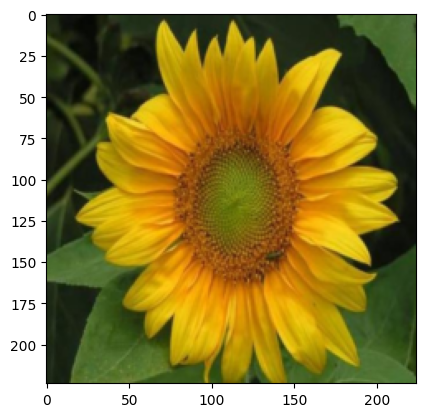

In [17]:
def imshow(img):
    plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(images)
print(labels.shape)